In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def triangular_list(x_list, a, b, c, T=48):
    """
    Triangular fuzzy membership function 

    Input:
    x_list (float): a iterable list or ndarray of input value
    a (float): left boundary
    b (float): center point
    c (float): right boundary

    Output:
    float: degree of membership in the fuzzy set
    """
    y = []
    for x in x_list:
        if x > (T - 1 + a):
            x -= T 
            
        if x <= a or x >= c:
            yy = 0
        elif a < x <= b:
            yy = (x - a) / (b - a)
        elif b < x < c:
            yy = (c - x) / (c - b)
        y.append(yy)
    return np.asarray(y)

 a: [-10, -3, 13, 18, 29, 34]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [18, 29, 34, 38, 45, 61]


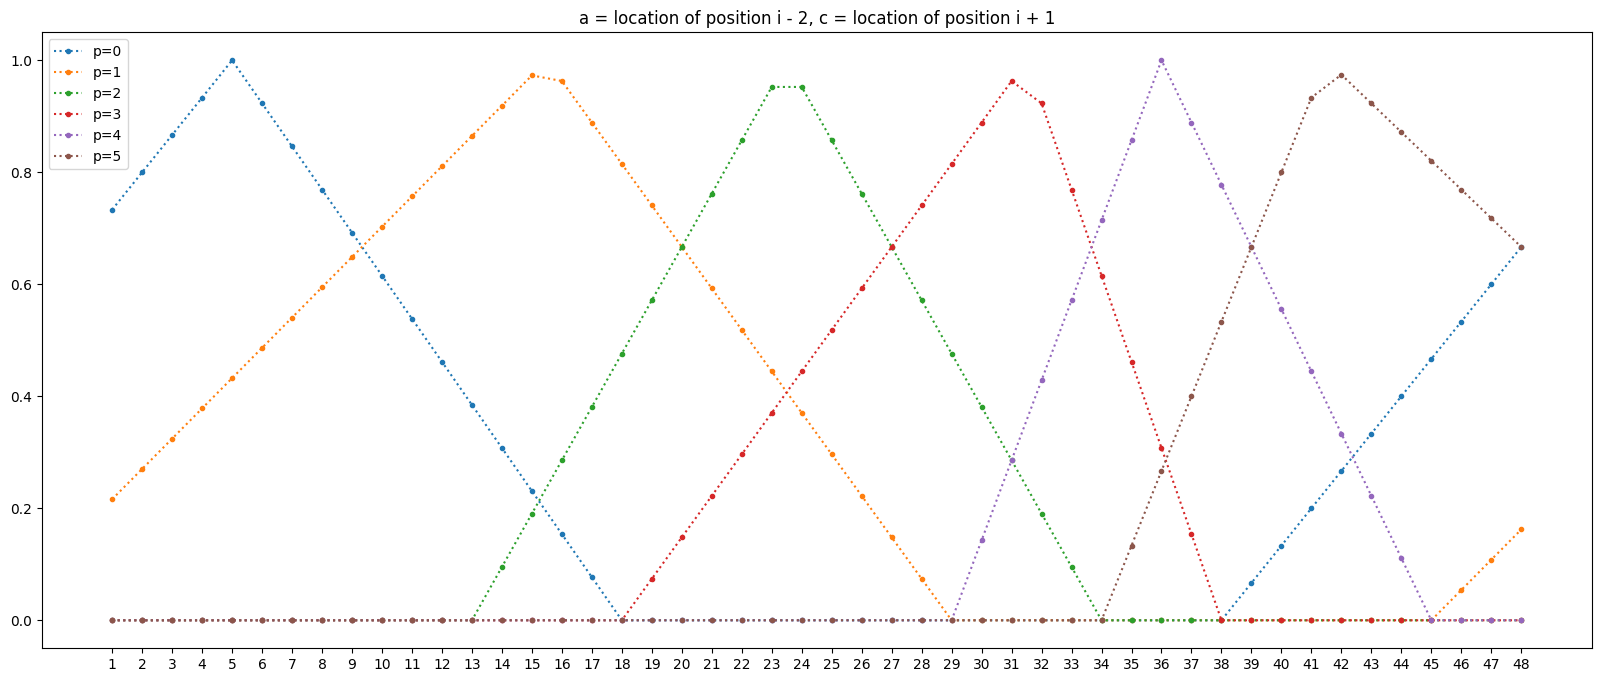

In [29]:
# b = location of the midian position between i and i-1
# a = location of position i-2
# c = location of position i+1

def get_triangular_params_0(time_position_list=[13, 18, 29, 34, 38, 45], T=48):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):                                                                                                                                                                                                                                                                                                                                             
        a = time_position_list[(j - 2) % num_positions]
        c = time_position_list[(j + 1) % num_positions]
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j] + T) - T
        else:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        if b < a:
            a -= T
        elif c < b:
            c += T
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)

    return a_list, b_list, c_list

a, b, c = get_triangular_params_0()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()

x = np.arange(1, 49)
for i in range(6):
    y = triangular_list(x, a[i], b[i], c[i])
    ax.plot(x, y, ':.', label=f'p={i}')

ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a = location of position i - 2, c = location of position i + 1')
ax.legend(loc=2)
plt.show()


 a: [-3, 13, 18, 29, 34, 38]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [13, 18, 29, 34, 38, 45]


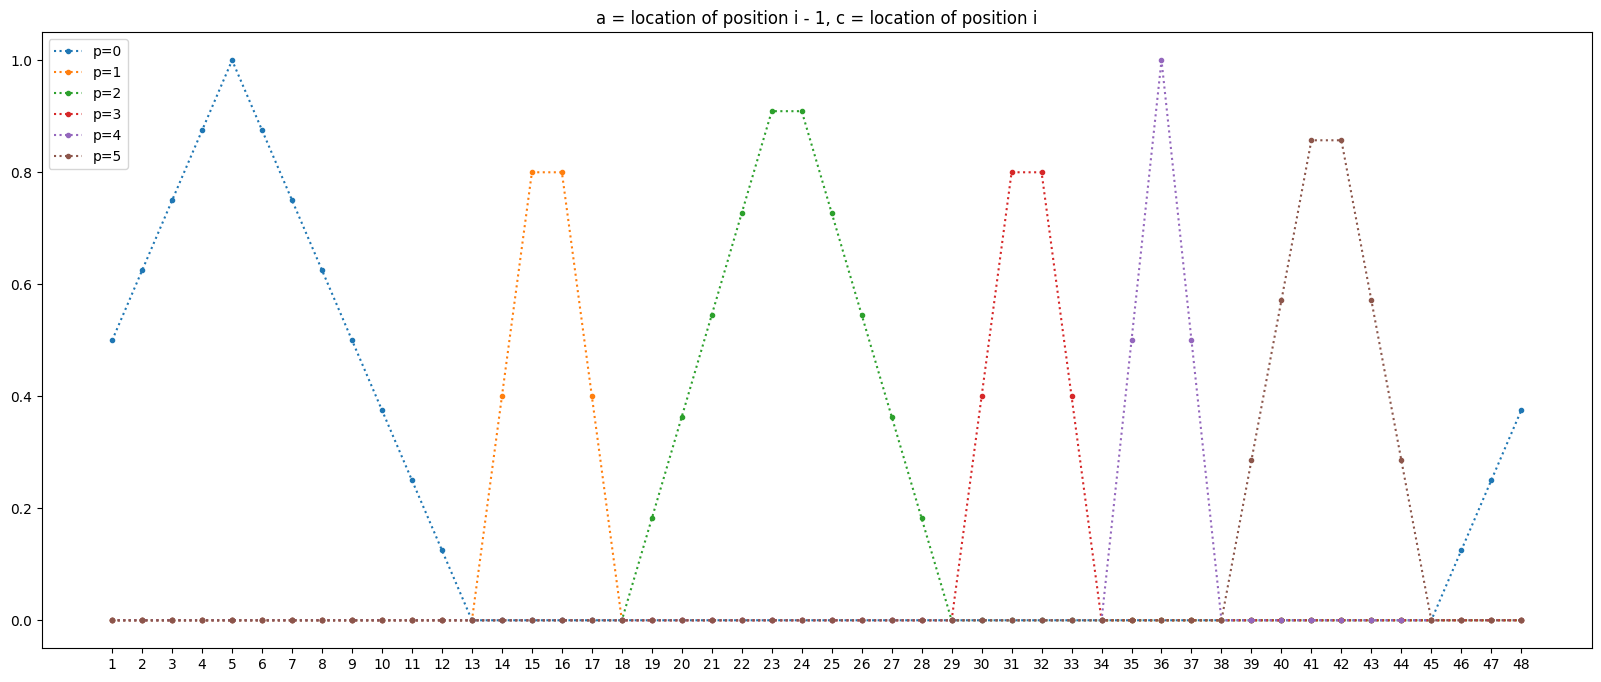

In [41]:
# b = location of the midian position between i and i-1
# a = location of position i-1
# c = location of position i

def get_triangular_params_1(time_position_list=[13, 18, 29, 34, 38, 45], T=48):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):                                                                                                                                                                                                                                                                                                                                             
        a = time_position_list[(j - 1) % num_positions]
        c = time_position_list[j]
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j] + T) - T
        else:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        if b < a:
            a -= T
        elif c < b:
            c += T
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)


    return a_list, b_list, c_list


a, b, c = get_triangular_params_1()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()

x = np.arange(1, 49)
for i in range(6):
    y = triangular_list(x, a[i], b[i], c[i])
    ax.plot(x, y, ':.', label=f'p={i}')

ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a = location of position i - 1, c = location of position i')
ax.legend(loc=2)
plt.show()

 a: [-5, 11, 16, 27, 32, 36]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [15, 20, 31, 36, 40, 47]


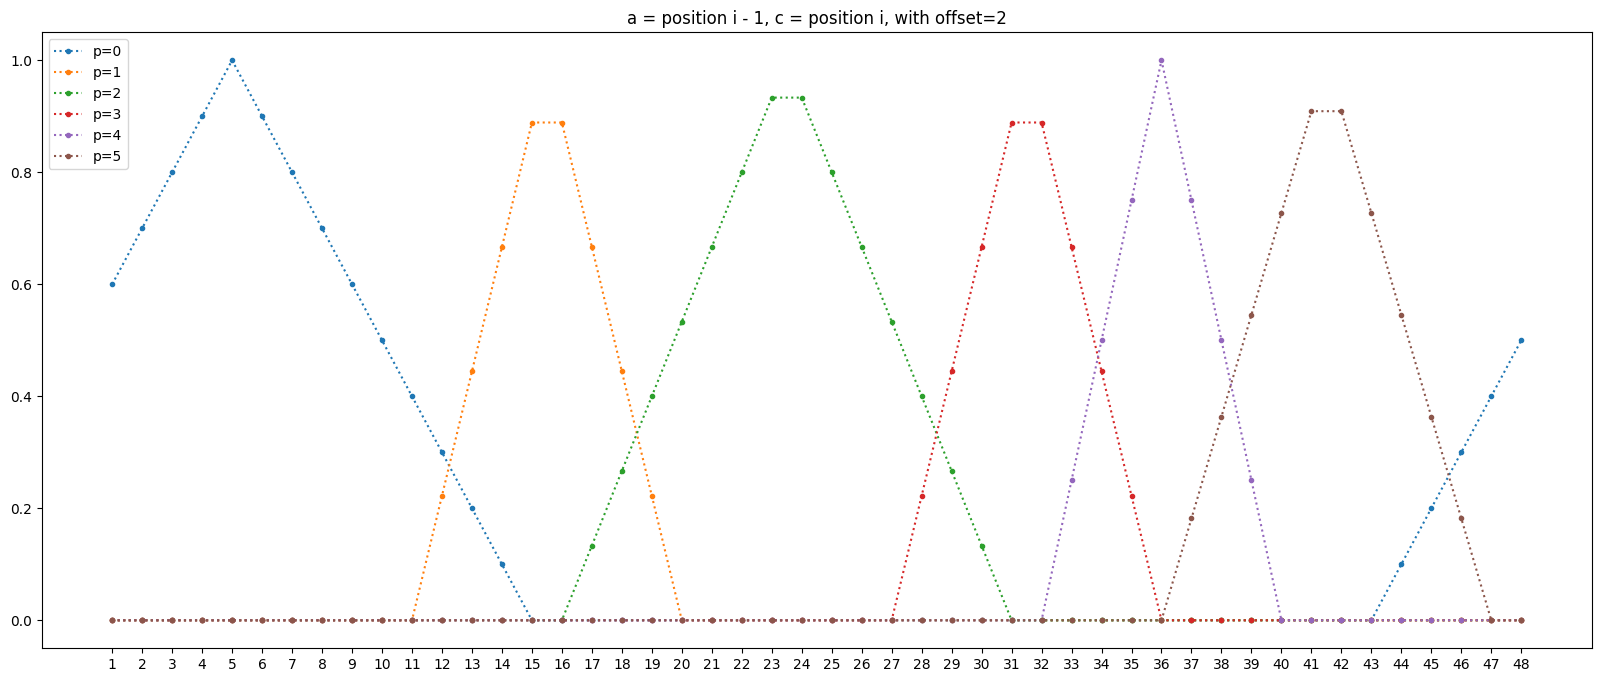

In [45]:
# b = location of the midian position between i and i-1
# a = location of position i-1
# c = location of position i

def get_triangular_params_2(time_position_list=[13, 18, 29, 34, 38, 45], T=48, offset=2):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):                                                                                                                                                                                                                                                                                                                                             
        a = (time_position_list[(j - 1) % num_positions] - offset) % T
        c = (time_position_list[j] + offset) % T
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j] + T) - T
        else:
            b = 0.5 * (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        if b < a:
            a -= T
        elif c < b:
            c += T
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)


    return a_list, b_list, c_list


a, b, c = get_triangular_params_2()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()

x = np.arange(1, 49)
for i in range(6):
    y = triangular_list(x, a[i], b[i], c[i])
    ax.plot(x, y, ':.', label=f'p={i}')

ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a = position i - 1, c = position i, with offset=2')
ax.legend(loc=2)
plt.show()

In [68]:
def asymmetric_gaussian_list(x_list, left_sigma, mean, right_sigma, T=48):
    """
    Asymmetric Gaussian fuzzy membership function

    Input:
    x (float): input value
    mean (float): mean value of the fuzzy set
    left_sigma (float): standard deviation of the fuzzy set
    right_sigma (float): standard deviation of the fuzzy set

    Output:
    float: degree of membership in the fuzzy set
    """
    y = []
    for x in x_list:
        if x > (T - 1 + mean - left_sigma):
            x -= T
        if x < mean:
            yy = np.exp(-0.5*((x-mean)/left_sigma)**2)
        else:
            yy = np.exp(-0.5*((x-mean)/right_sigma)**2)
        y.append(yy)
    return np.asarray(y)


 a: [16, 5, 11, 5, 4, 7]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [5, 11, 5, 4, 7, 16]


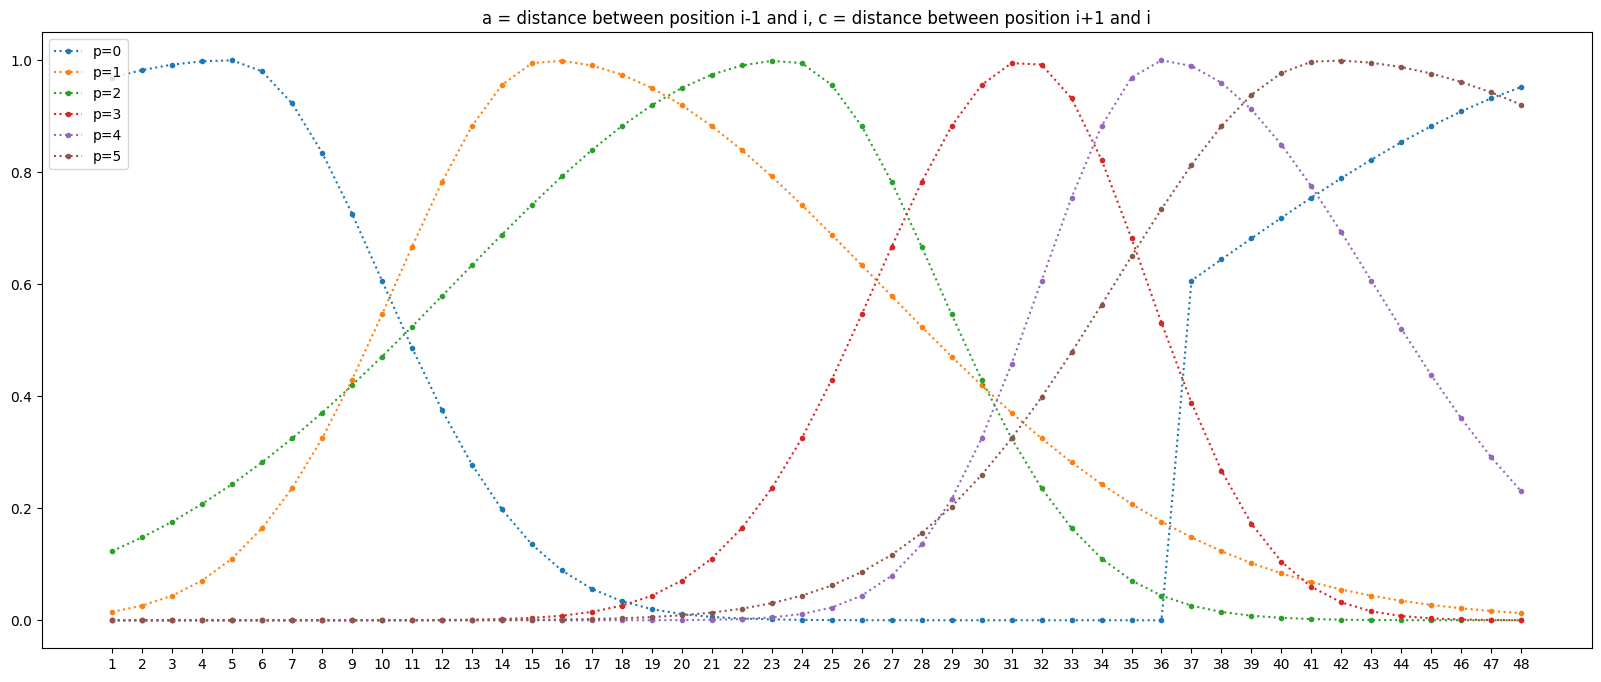

In [42]:
# b = location of the midian position between i and i-1
# a = the distance between position i-i and i
# c = the distance between position i+1 and i

def get_guassian_params_0(time_position_list=[13, 18, 29, 34, 38, 45], T=48):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] +
                    time_position_list[j] + T) - T
        else:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        a = (time_position_list[j] - time_position_list[(j - 1) % num_positions] + T) % T
        c = (time_position_list[(j + 1) % num_positions] - time_position_list[j] + T) % T
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
        
    return a_list, b_list, c_list


a, b, c = get_guassian_params_0()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()

x = np.arange(1, 49)
for i in range(6):
    y = asymmetric_gaussian_list(x, a[i], b[i], c[i])
    ax.plot(x, y, ':.', label=f'p={i}')

ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a = distance between position i-1 and i, c = distance between position i+1 and i')
ax.legend(loc=2)
plt.show()

 a: [8.0, 2.5, 5.5, 2.5, 2.0, 3.5]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [8.0, 2.5, 5.5, 2.5, 2.0, 3.5]


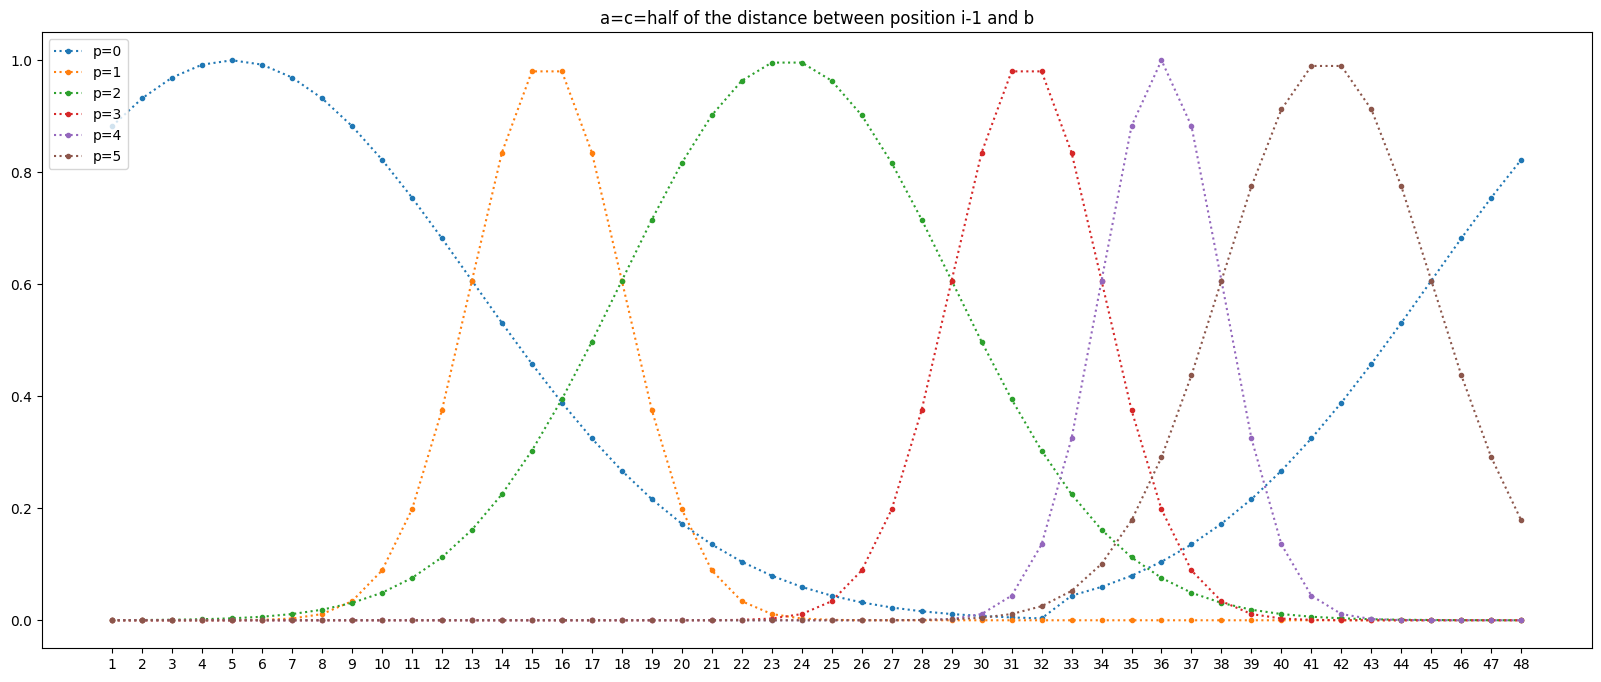

In [65]:
# b = location of the midian position between i and i-1
# a = c = half of the distance between position i-1 and b

def get_guassian_params_1(time_position_list=[13, 18, 29, 34, 38, 45], T=48):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] +
                    time_position_list[j] + T) - T
        else:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        a = (time_position_list[j] - b + T) % T
        c = a
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
    return a_list, b_list, c_list


a, b, c = get_guassian_params_1()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()
x = np.arange(1, 49)
y = []
for i in range(6):
    aa = a[i]
    bb = b[i]
    cc = c[i]
    yy = asymmetric_gaussian_list(x, aa, bb, cc)
    y.append(yy)
for i in range(6):
    ax.plot(x, y[i], ':.', label=f'p={i}')
ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a=c=half of the distance between position i-1 and b')
ax.legend(loc=2)
plt.show()

 a: [6.0, 7.4, 4.2, 5.4, 2.8000000000000003, 3.0]
 b: [5.0, 15.5, 23.5, 31.5, 36.0, 41.5]
 c: [5.2, 5.4, 4.2, 2.6, 3.6, 7.800000000000001]


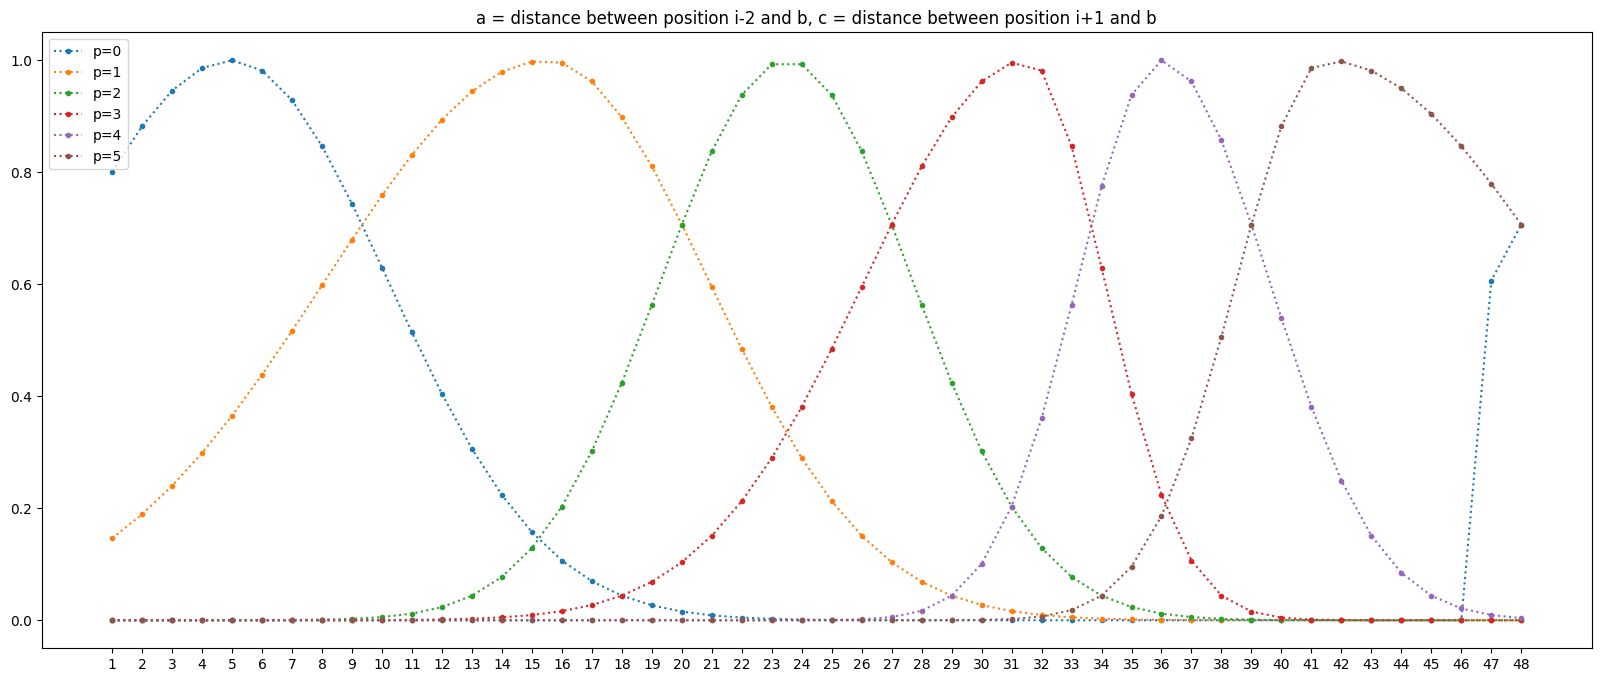

In [71]:
# b = location of the midian position between i and i-1
# a = distance between position i-2 and b
# c = distance between position i+1 and b

def get_guassian_params_2(time_position_list=[13, 18, 29, 34, 38, 45], T=48, offset=0.4):
    
    a_list = []
    b_list = []
    c_list = []
    num_positions = len(time_position_list)

    for j in range(num_positions):
        if time_position_list[(j - 1) % num_positions] > time_position_list[j]:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] +
                    time_position_list[j] + T) - T
        else:
            b = 0.5 * \
                (time_position_list[(j - 1) % num_positions] + time_position_list[j])
        a = (b - time_position_list[(j - 2) % num_positions] + T) % T
        c = (time_position_list[(j + 1) % num_positions] - b + T) % T 
        # a = c
        a_list.append(offset * a)
        b_list.append(b)
        c_list.append(offset * c)
    return a_list, b_list, c_list


a, b, c = get_guassian_params_2()
print(f' a: {a}\n b: {b}\n c: {c}')

fig = plt.figure(num=1, figsize=(20, 8))
ax = fig.add_subplot()
x = np.arange(1, 49)
y = []
for i in range(6):
    aa = a[i]
    bb = b[i]
    cc = c[i]
    yy = asymmetric_gaussian_list(x, aa, bb, cc)
    y.append(yy)
for i in range(6):
    ax.plot(x, y[i], ':.', label=f'p={i}')
ax.set_xticks(np.arange(1, 49))
ax.set_xticklabels(np.arange(1, 49))
ax.set_title('a = distance between position i-2 and b, c = distance between position i+1 and b')
ax.legend(loc=2)
plt.show()